In [1]:
"""2-input xor example.
"""
import os
import neat
import visualize

xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]

print('xor_inputs', xor_inputs)
print('xor_outputs', xor_outputs)

xor_inputs [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs [(0.0,), (1.0,), (1.0,), (0.0,)]


In [2]:
print(os.getcwd)

<built-in function getcwd>


In [3]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


local_dir = os.getcwd()
config_file = os.path.join(local_dir, 'config-feedforward')

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                    neat.DefaultSpeciesSet, neat.DefaultStagnation,
                    config_file)
p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

winner = p.run(eval_genomes, 300)

print('----------------------------------------------------------------------------------------------------------')
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')



 ****** Running generation 0 ****** 

Population's average fitness: 2.22236 stdev: 0.34007
Best fitness: 2.99678 - size: (1, 2) - species 1 - id 41
Average adjusted fitness: 0.571
Mean genetic distance 1.128, standard deviation 0.427
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.571     0
Total extinctions: 0
Generation time: 0.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.30114 stdev: 0.31586
Best fitness: 2.99678 - size: (1, 2) - species 1 - id 41
Average adjusted fitness: 0.557
Mean genetic distance 1.236, standard deviation 0.450
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.557     1
Total extinctions: 0
Generation time: 0.012 sec (0.013 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.31804 stdev: 0.

     1   26    55      3.0    0.252    12
     2   17    56      3.3    0.292     2
     3   15    39      3.0    0.207     0
Total extinctions: 0
Generation time: 0.017 sec (0.018 average)

 ****** Running generation 27 ****** 

Population's average fitness: 2.38102 stdev: 0.44352
Best fitness: 3.33215 - size: (3, 4) - species 2 - id 3615
Average adjusted fitness: 0.306
Mean genetic distance 2.147, standard deviation 0.738
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27    53      3.0    0.251    13
     2   18    55      3.3    0.320     3
     3   16    42      3.0    0.348     0
Total extinctions: 0
Generation time: 0.041 sec (0.020 average)

 ****** Running generation 28 ****** 

Population's average fitness: 2.37932 stdev: 0.44368
Best fitness: 3.33215 - size: (3, 4) - species 2 - id 3615
Average adjusted fitness: 0.281
Mean genetic distance 2.202, standard deviation 0.659
Population of 150 me

In [4]:
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

for xi, xo in zip(xor_inputs, xor_outputs):
    output = winner_net.activate(xi)
    print('input {!r}, expected output {!r}, got {!r}'.format(xi, xo, output))


input (0.0, 0.0), expected output (0.0,), got [0.001446610422953072]
input (0.0, 1.0), expected output (1.0,), got [0.996910899279654]
input (1.0, 0.0), expected output (1.0,), got [0.9977960167230298]
input (1.0, 1.0), expected output (0.0,), got [0.0021626620065767375]


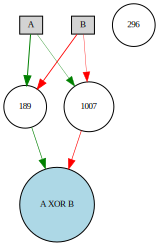

In [5]:
node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
visualize.draw_net(config, winner, True, node_names=node_names)

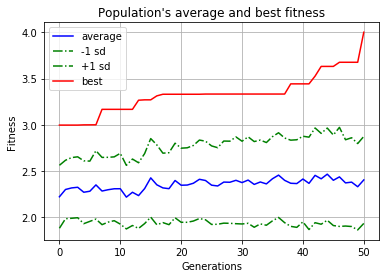

In [6]:
visualize.plot_stats(stats, ylog=False, view=True)

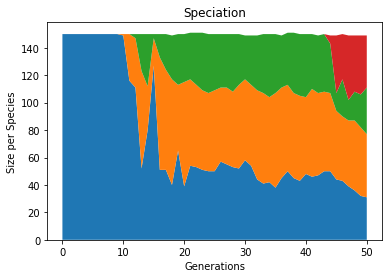

In [7]:
visualize.plot_species(stats, view=True)

In [8]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
p.run(eval_genomes, 10)

Mean genetic distance 1.389, standard deviation 0.517
Mean genetic distance 1.519, standard deviation 0.530
Mean genetic distance 1.659, standard deviation 0.542
Mean genetic distance 1.743, standard deviation 0.539
Mean genetic distance 2.101, standard deviation 0.616
Mean genetic distance 2.159, standard deviation 0.666
Mean genetic distance 2.145, standard deviation 0.671
Mean genetic distance 2.099, standard deviation 0.640
Mean genetic distance 2.078, standard deviation 0.651
Mean genetic distance 1.988, standard deviation 0.581
